
# Image Classification with CNN


Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

------------

## Task

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

In [21]:
classes=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

## The Data

**Download the fashion mnist dataset using Keras.**

In [6]:
import pandas as pd
import seaborn as sns
import tensorflow as tf                       
import numpy as np                           
import matplotlib.pyplot as plt  

In [7]:
from matplotlib.image import imread

In [1]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 2s 0us/step


## Visualizing the Data

**Using matplotlib show an any image from the data set.**

In [3]:
x_train[5].shape

(28, 28)

In [4]:
x_train[5]

array([[  0,   0,   0,   0,   1,   0,   0,   0,   0,  22,  88, 188, 172,
        132, 125, 141, 199, 143,   9,   0,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,  20, 131, 199, 206, 196, 202, 242,
        255, 255, 250, 222, 197, 206, 188, 126,  17,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,  35, 214, 191, 183, 178, 175, 168, 150,
        162, 159, 152, 158, 179, 183, 189, 195, 185,  82,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 170, 190, 172, 177, 176, 171, 169, 162,
        155, 148, 154, 169, 174, 175, 175, 177, 183, 188,  12,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  25, 194, 180, 178, 174, 184, 187, 189, 187,
        184, 181, 189, 200, 197, 193, 190, 178, 175, 194,  90,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  42, 218, 191, 197, 208, 204, 211, 209, 210,
        212, 211, 214, 215, 213, 214, 211, 211, 191, 200, 158,   0,   0,
          0,   0],
       [  

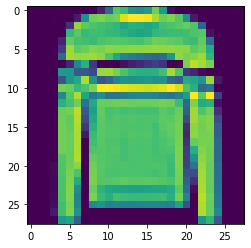

In [8]:
plt.imshow(x_train[5])

In [19]:
x_train.shape

(60000, 28, 28)

In [20]:
y_train.shape

(60000,)

In [17]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

## Preprocessing the Data

**Normalize the X train and X test using max value of the image arrays.**

255

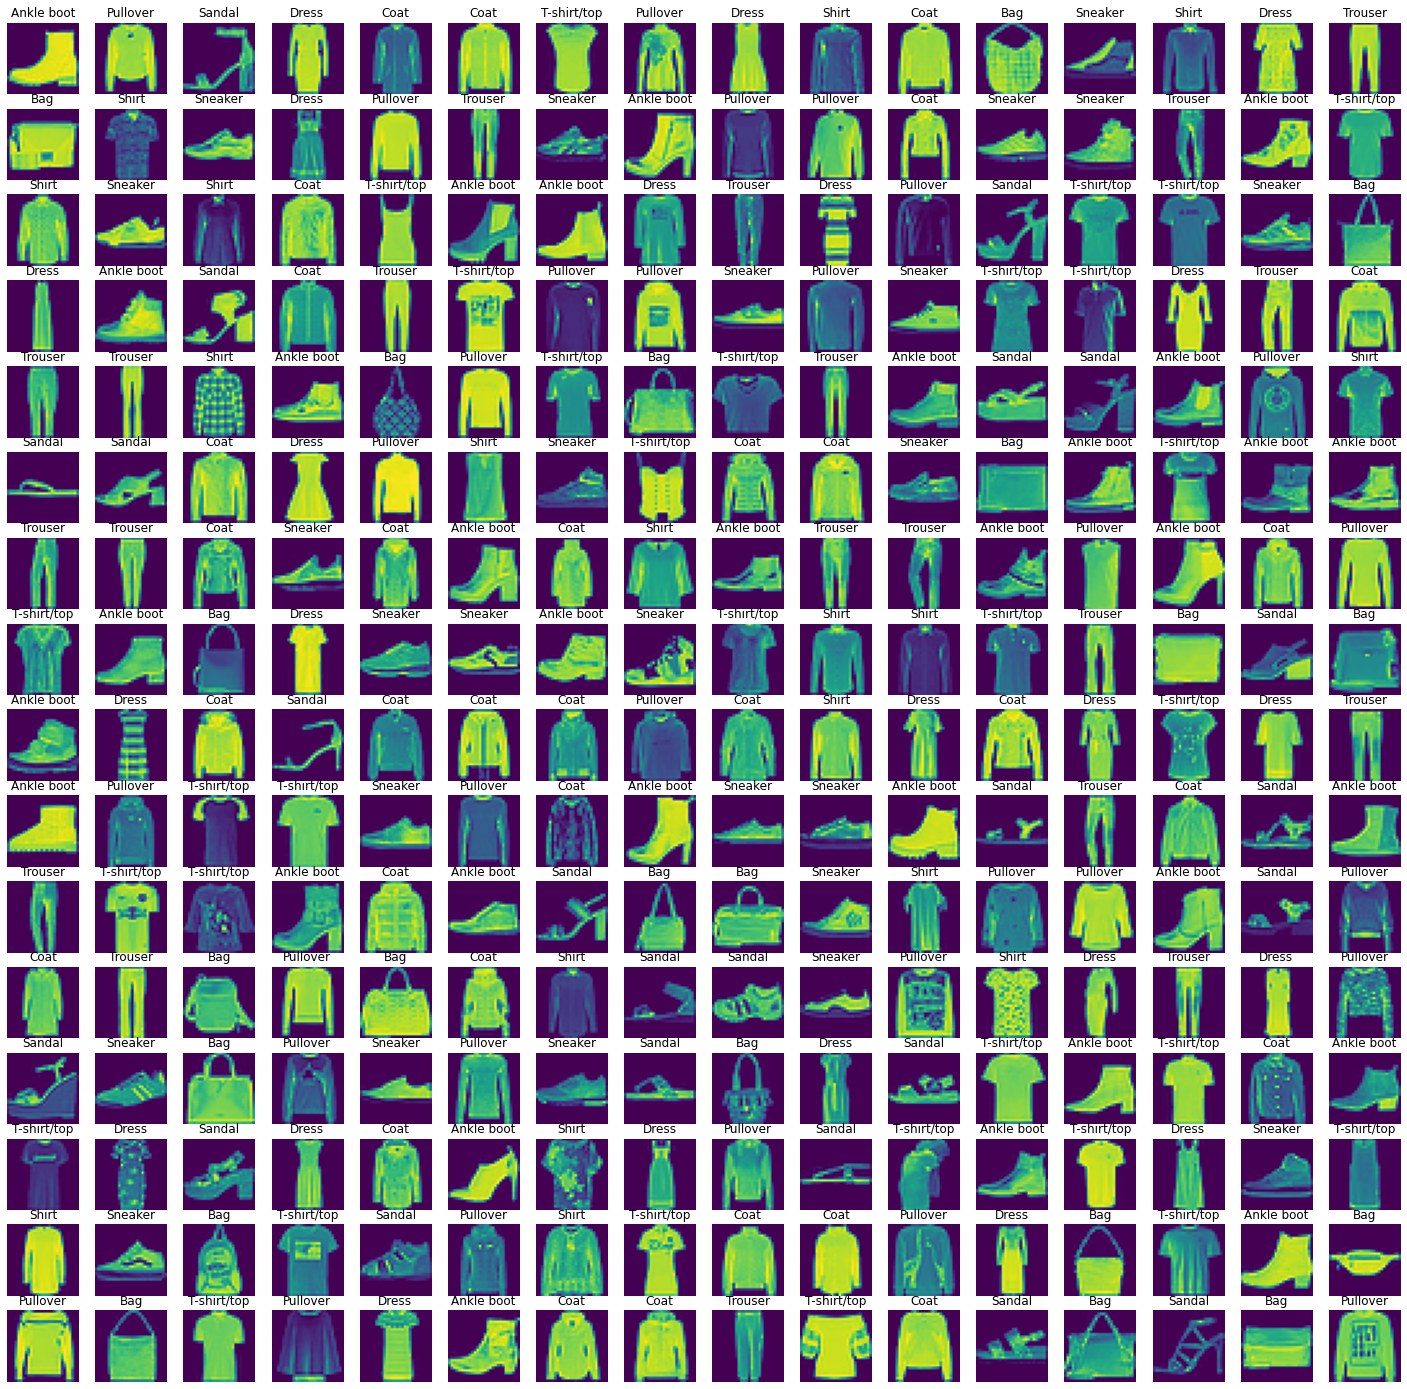

In [23]:
plt.figure(figsize=(25, 25))
for i in range(256):
    rand_index = int(np.random.randint(low=0, high=60000, size=1))
    plt.subplot(16, 16, i+1, label=classes[int(y_train[rand_index])])
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(x_train[rand_index])  

In [25]:
x_train[5].min()

0

In [26]:
x_train[5].max()

255

In [29]:
# Normalize image pixels
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [31]:
x_train[5].min()

0.0

In [32]:
x_train[5].max()


1.0

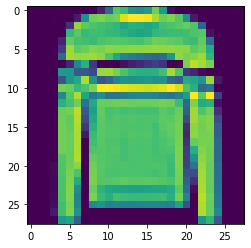

In [33]:
plt.imshow(x_train[5])

In [34]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [35]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [36]:
from tensorflow.keras.utils import to_categorical

In [67]:
y_train = to_categorical(y_train, 10) 
y_test = to_categorical(y_test, 10)
y_test.shape

(10000, 10)

**Reshape the X into 4 dimension**

In [50]:
x_train = x_train.reshape(x_train.shape[0],28, 28, 1) 
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [52]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**Convert the y_train and y_test values to be one-hot encoded for categorical analysis.**

In [53]:
y_train[0].reshape(-1,1)

array([[9]], dtype=uint8)

In [68]:
y_train[0].reshape(-1,1)

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.]], dtype=float32)

## Building the Model

**Create the model**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [65]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [66]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 28)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 4732)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               605824    
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
________________________________________________

###  Model Training 

**Train the model with arbitrary amount of epochs.**

In [44]:
from tensorflow.keras.callbacks import EarlyStopping

In [56]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [69]:
model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test,y_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.3928 - accuracy: 0.8609 - val_loss: 0.3095 - val_accuracy: 0.8853
Epoch 2/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2670 - accuracy: 0.9047 - val_loss: 0.2759 - val_accuracy: 0.8975
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2284 - accuracy: 0.9190 - val_loss: 0.2732 - val_accuracy: 0.9028
Epoch 4/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2044 - accuracy: 0.9261 - val_loss: 0.2673 - val_accuracy: 0.9099
Epoch 5/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1853 - accuracy: 0.9342 - val_loss: 0.2920 - val_accuracy: 0.9090
Epoch 6/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1714 - accuracy: 0.9400 - val_loss: 0.2896 - val_accuracy: 0.9094


**Plot values of metrics you used in your model.**

**Train the model using earlystop.**

**Plot values of metrics you used in your model.**

### Model Evaluation

**Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set.**

['loss', 'acc']

             precision    recall  f1-score   support

          0       0.86      0.85      0.85      1000
          1       0.99      0.97      0.98      1000
          2       0.88      0.83      0.85      1000
          3       0.91      0.91      0.91      1000
          4       0.83      0.88      0.85      1000
          5       0.97      0.98      0.98      1000
          6       0.73      0.76      0.74      1000
          7       0.95      0.97      0.96      1000
          8       0.99      0.97      0.98      1000
          9       0.98      0.94      0.96      1000

avg / total       0.91      0.91      0.91     10000



# Prediction

# End of Assignment